In [1]:
%matplotlib inline

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-1o491zv4 because the default path (/home/dforeman/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
import numpy as np
from scipy.ndimage import gaussian_filter

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from astropy.io import fits

In [3]:
plt.style.use("default")
plt.rcParams["savefig.dpi"] = 100
plt.rcParams["figure.dpi"] = 100
plt.rcParams["font.size"] = 16
plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.sans-serif"] = ["Liberation Sans"]
plt.rcParams["font.cursive"] = ["Liberation Sans"]
plt.rcParams["mathtext.fontset"] = "custom"
get_ipython().magic('config InlineBackend.figure_format = "retina"')

In [4]:
with fits.open("/data/rv_uncertainty_grid.fits") as f:
    hdr = f[0].header
    mu = f[1].data
    sigma = f[2].data
    
color_bins = np.linspace(hdr["MIN_COL"], hdr["MAX_COL"], hdr["NUM_COL"] + 1)
mag_bins = np.linspace(hdr["MIN_MAG"], hdr["MAX_MAG"], hdr["NUM_MAG"] + 1)
ivar = 1.0 / sigma ** 2

In [5]:
mu_smooth = gaussian_filter(np.mean(mu, axis=-1), (1, 0.8))

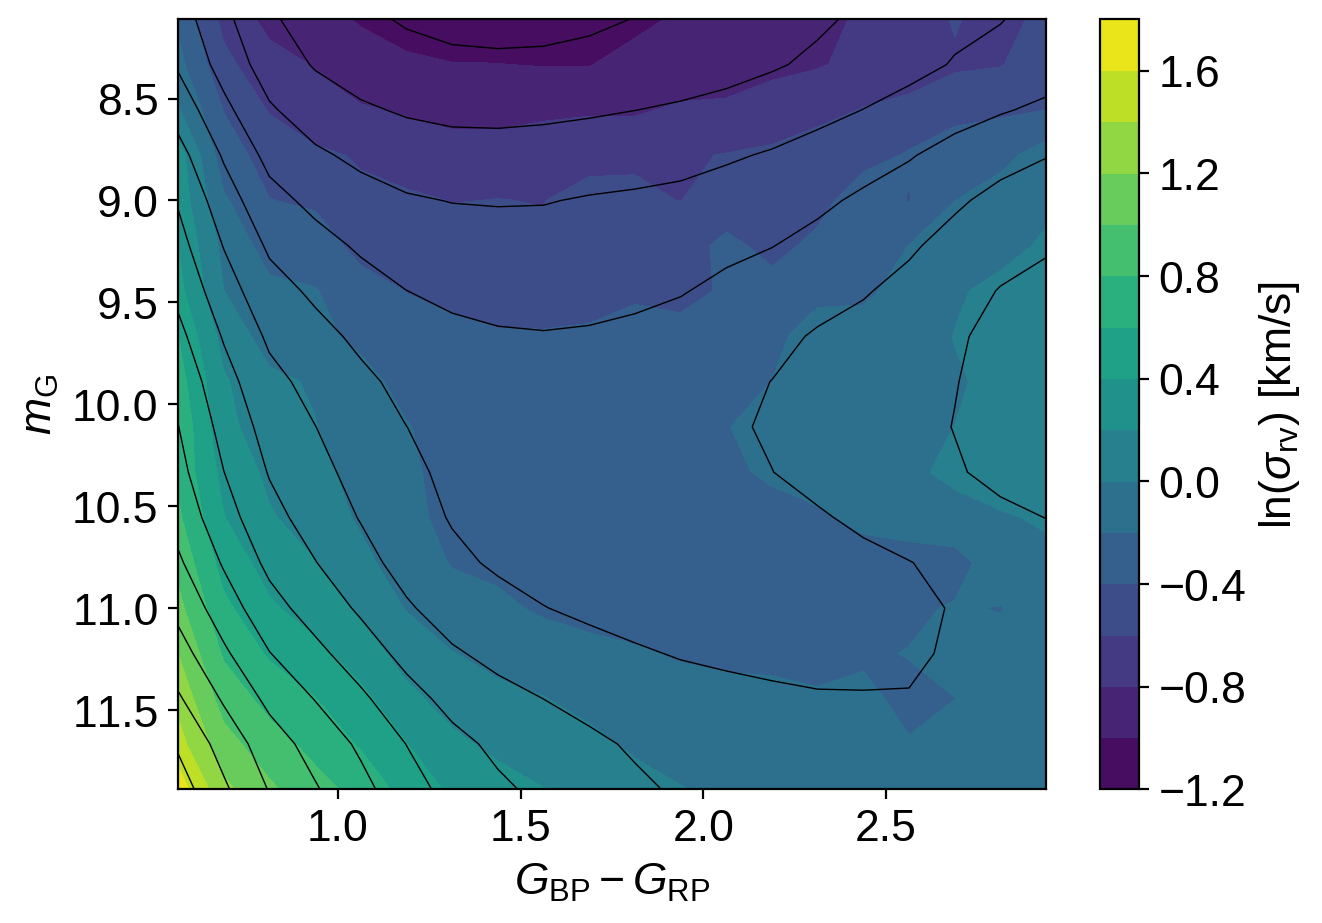

In [6]:
plt.figure(figsize=(7, 5))

# plt.pcolor(color_bins, mag_bins, np.mean(mu, axis=-1))
c = plt.contourf(
    0.5 * (color_bins[:-1] + color_bins[1:]),
    0.5 * (mag_bins[:-1] + mag_bins[1:]),
    np.mean(mu, axis=-1),
    levels=15
)
plt.contour(
    0.5 * (color_bins[:-1] + color_bins[1:]),
    0.5 * (mag_bins[:-1] + mag_bins[1:]),
    mu_smooth,
    colors="k",
    linestyles="solid",
    linewidths=0.5,
    levels=15
)

plt.colorbar(c, label=r"$\ln(\sigma_\mathrm{rv})$ [km/s]")
plt.ylim(plt.ylim()[::-1])
plt.ylabel("$m_\mathrm{G}$")
plt.xlabel("$G_\mathrm{BP}-G_\mathrm{RP}$");

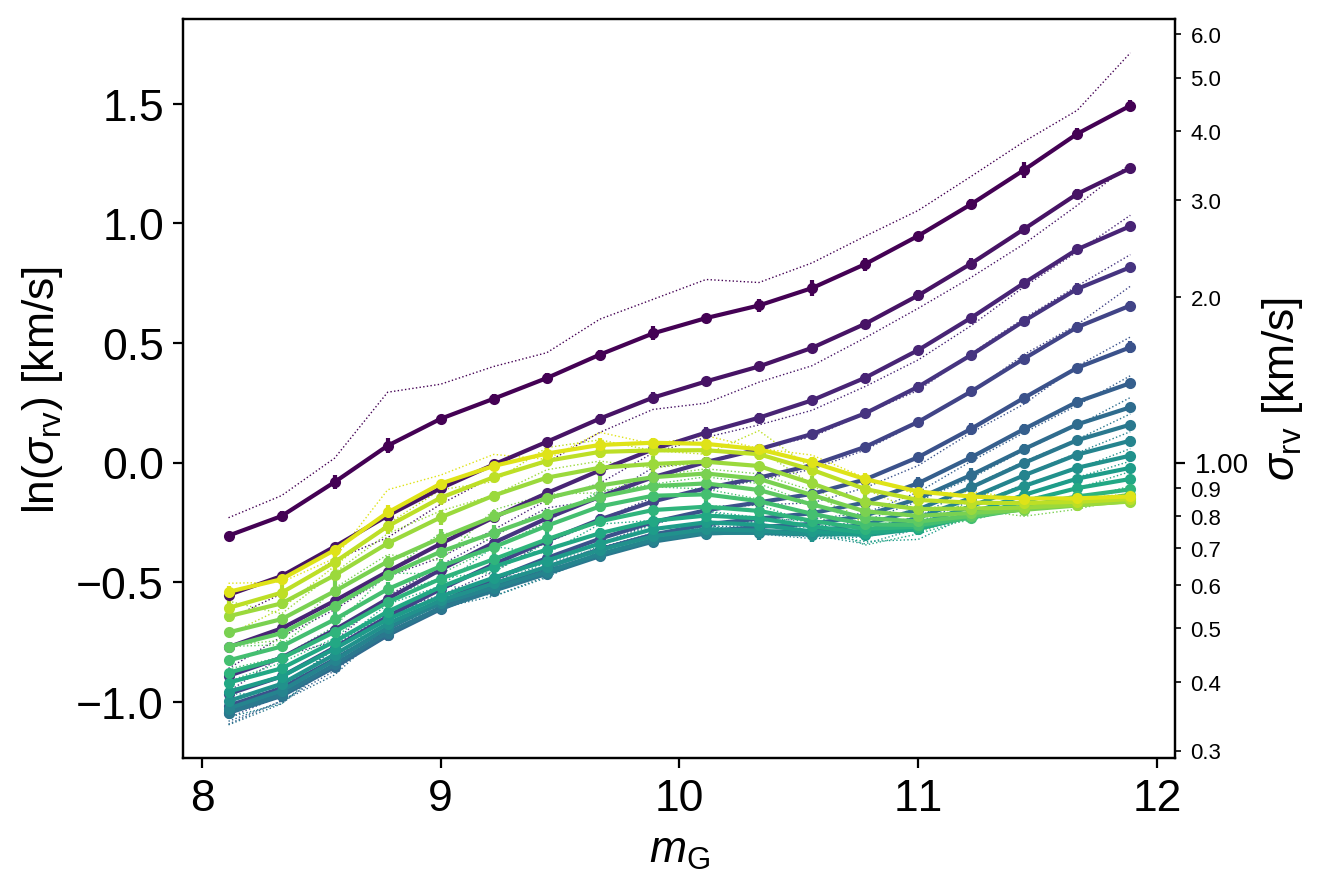

In [7]:
for m in range(len(color_bins) - 1):
    plt.plot(
        0.5 * (mag_bins[1:] + mag_bins[:-1]),
        np.mean(mu[:, m], axis=-1),
        ":",
        lw=0.5,
        color=plt.cm.viridis(m / (len(color_bins) - 1)))
    plt.errorbar(
        0.5 * (mag_bins[1:] + mag_bins[:-1]),
        mu_smooth[:, m], 
        yerr=np.std(mu[:, m], axis=-1),
        fmt=".-",
        color=plt.cm.viridis(m / (len(color_bins) - 1)),
        label="BP$-$RP = {0:.3f}".format(0.5*(color_bins[m] + color_bins[m + 1])))
plt.ylabel(r"$\ln (\sigma_\mathrm{rv})$ [km/s]")
plt.xlabel("$m_\mathrm{G}$")
ylim = plt.ylim()

ax2 = plt.gca().twinx()
ax2.set_ylim(np.exp(ylim))
ax2.set_yscale("log")
ax2.yaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax2.yaxis.set_minor_formatter(mpl.ticker.ScalarFormatter())
ax2.tick_params(axis='both', which='major', labelsize=10)
ax2.tick_params(axis='both', which='minor', labelsize=8)
ax2.set_ylabel(r"$\sigma_\mathrm{rv}$ [km/s]");

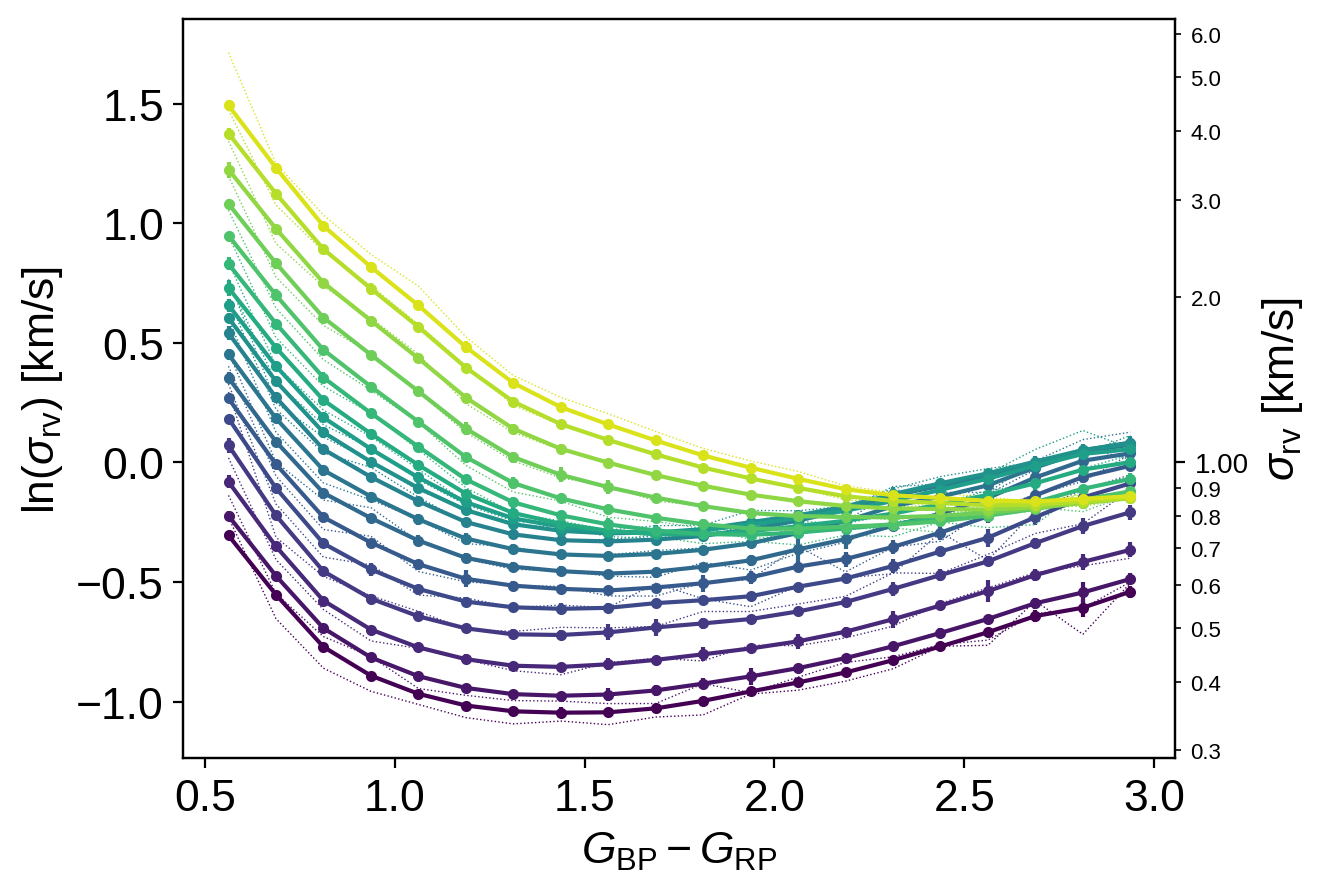

In [8]:
for n in range(len(mag_bins) - 1):
    plt.plot(
        0.5 * (color_bins[1:] + color_bins[:-1]),
        np.mean(mu[n], axis=-1),
        ":",
        lw=0.5,
        color=plt.cm.viridis(n / (len(mag_bins) - 1)))
    plt.errorbar(
        0.5 * (color_bins[1:] + color_bins[:-1]),
        mu_smooth[n], 
        yerr=np.std(mu[n], axis=-1),
        fmt=".-",
        color=plt.cm.viridis(n / (len(mag_bins) - 1)),
        label="$m_G$ = {0:.3f}".format(0.5*(mag_bins[n] + mag_bins[n + 1])))
plt.ylabel(r"$\ln(\sigma_\mathrm{rv})$ [km/s]")
plt.xlabel("$G_\mathrm{BP}-G_\mathrm{RP}$")
# plt.legend(fontsize=10)

ax2 = plt.gca().twinx()
ax2.set_ylim(np.exp(ylim))
ax2.set_yscale("log")
ax2.yaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax2.yaxis.set_minor_formatter(mpl.ticker.ScalarFormatter())
ax2.tick_params(axis='both', which='major', labelsize=10)
ax2.tick_params(axis='both', which='minor', labelsize=8)
ax2.set_ylabel(r"$\sigma_\mathrm{rv}$ [km/s]");

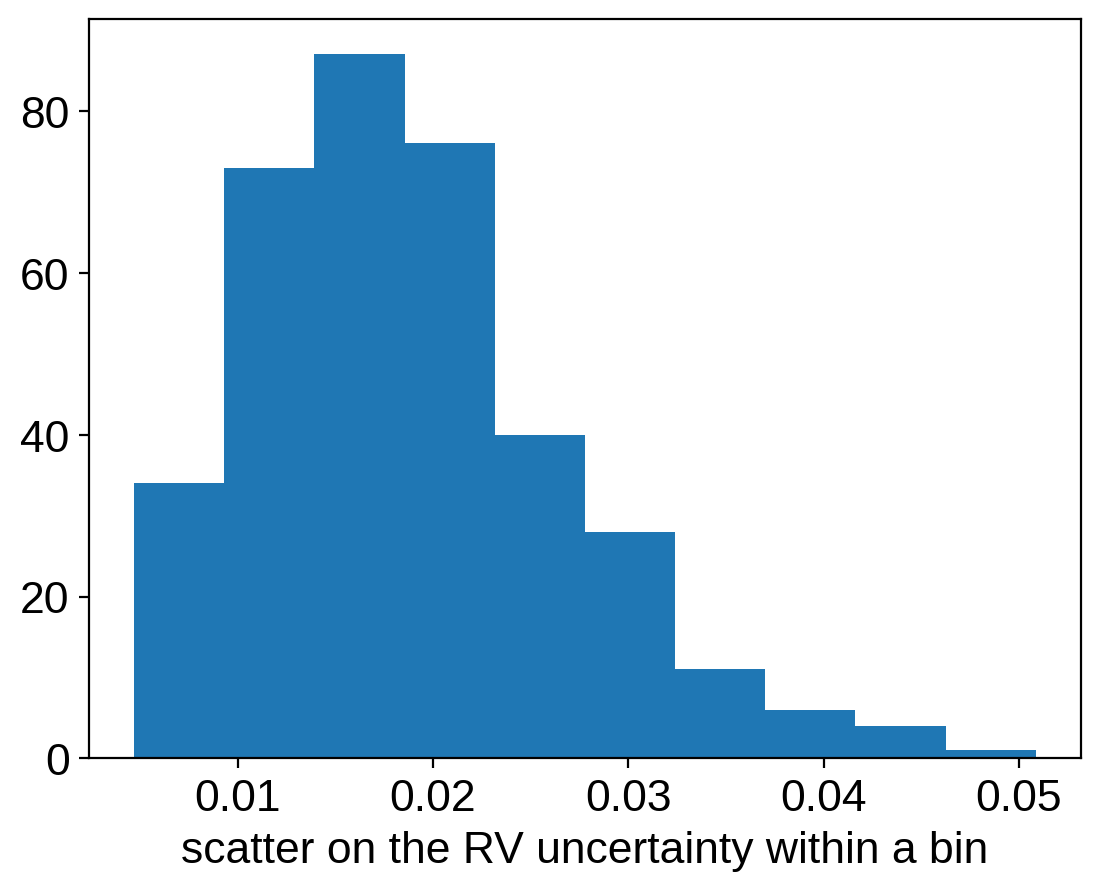

In [9]:
plt.hist(np.std(mu, axis=-1).flatten())
plt.xlabel("scatter on the RV uncertainty within a bin");